<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb

import cv2 as cv
from tqdm import tqdm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df_cat_prime.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))
df1_test.reset_index(inplace=True,drop=True)

1049
1048


In [5]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()
name ='06fdaa2b03d70da4358311d260456729'


img = cv.imread(img_path +'/'+ name+'.jpg',cv.IMREAD_GRAYSCALE)


In [6]:
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [7]:
img = cv.imread(img_path +'/'+ name+'.jpg',cv.IMREAD_GRAYSCALE)
sobel_x = [[-1,0,1],
           [-2,0,2],
           [-1,0,1]]

sobel_y = [[-1,-2,-1],
           [0,0,0],
           [1,2,1]]
[width,height] = np.shape(img)
img2 = img.copy()

for x in range(width-2) :
  for y in range (height-2) :
   
    pixel_x = (sobel_x[0][0] * img [x-1][y-1]) + (sobel_x[0][1] * img [x][y-1]) + (sobel_x[0][2] * img [x+1][y-1])+(sobel_x[1][0] * img [x-1][y] )  + (sobel_x[1][1] * img [x][y])   + (sobel_x[1][2] * img [x+1][y]) + (sobel_x[2][0] * img [x-1][y+1]) + (sobel_x[2][1] * img [x][y+1]) + (sobel_x[2][2] * img [x+1][y+1])
   
    pixel_y = (sobel_y[0][0] * img [x-1][y-1]) + (sobel_y[0][1] * img [x][y-1]) + (sobel_y[0][2] * img [x+1][y-1]) + (sobel_y[1][0] * img [x-1][y])   + (sobel_y[1][1] * img [x][y])   + (sobel_y[1][2] * img [x+1][y]) +(sobel_y[2][0] * img [x-1][y+1]) + (sobel_y[2][1] * img [x][y+1]) + (sobel_y[2][2] * img [x+1][y+1])

    val = np.sqrt((pixel_x * pixel_x) + (pixel_y * pixel_y))
    val = np.ceil(val)

    img2[x][y] = val



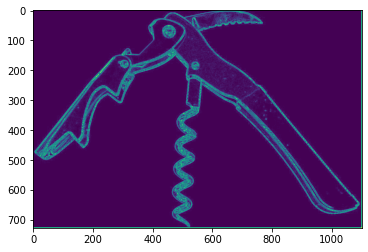

(<matplotlib.image.AxesImage at 0x7f9a1883c090>, None)

In [8]:

plt.imshow(img2), plt.show()

In [9]:
img2 = img.copy()

In [10]:
sobel_x

[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

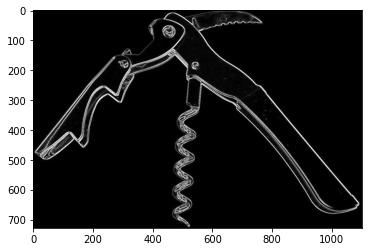

(<matplotlib.image.AxesImage at 0x7f9a178f02d0>, None)

In [14]:
import cv2
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.imshow(grad,cmap='gray'), plt.show()